In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt

pd_data_train = pd.read_csv('train1_20181104.csv')
pd_data_test = pd.read_csv('test_20181104.csv')

train_set = pd_data_train[:][['target','n_Loan_10','n_Loan_30','n_Loan_50','n_Loan_70','n_Act_Repay_10','n_Act_Repay_30','n_Act_Repay_50','n_Act_Repay_70','n_Odue_10','n_Odue_30','n_Odue_50','n_Odue_70','n_vld_Odue_10','n_vld_Odue_30','n_vld_Odue_50','n_vld_Odue_70','nDay_Odue_10','nDay_Odue_30','nDay_Odue_50','nDay_Odue_70','nDay_vld_Odue_10','nDay_vld_Odue_30','nDay_vld_Odue_50','nDay_vld_Odue_70','avg_Util_2_10','avg_Util_2_30','avg_Util_2_50','avg_Util_2_70','total_n_Odue_in_last_3','total_n_vld_Odue_in_last_3','total_nDay_Odue_in_last_3','total_nDay_vld_Odue_in_last_3','total_nDay_Interval_in_last_3','LOAN_RANK','total_n_Odue','total_nDay_Odue','total_n_vld_Odue','total_nDay_vld_Odue','total_n_Pdue','total_nDay_Pdue','total_nDay_Interval','max_nDay_Interval','Age','D_Male']]
test_set = pd_data_test[:][['target','n_Loan_10','n_Loan_30','n_Loan_50','n_Loan_70','n_Act_Repay_10','n_Act_Repay_30','n_Act_Repay_50','n_Act_Repay_70','n_Odue_10','n_Odue_30','n_Odue_50','n_Odue_70','n_vld_Odue_10','n_vld_Odue_30','n_vld_Odue_50','n_vld_Odue_70','nDay_Odue_10','nDay_Odue_30','nDay_Odue_50','nDay_Odue_70','nDay_vld_Odue_10','nDay_vld_Odue_30','nDay_vld_Odue_50','nDay_vld_Odue_70','avg_Util_2_10','avg_Util_2_30','avg_Util_2_50','avg_Util_2_70','total_n_Odue_in_last_3','total_n_vld_Odue_in_last_3','total_nDay_Odue_in_last_3','total_nDay_vld_Odue_in_last_3','total_nDay_Interval_in_last_3','LOAN_RANK','total_n_Odue','total_nDay_Odue','total_n_vld_Odue','total_nDay_vld_Odue','total_n_Pdue','total_nDay_Pdue','total_nDay_Interval','max_nDay_Interval','Age','D_Male']]

#np.where(np.isnan(test_set))

#from sklearn import preprocessing
#impute = preprocessing.Imputer()
#train_set = impute.fit_transform(train_set)
#test_set = impute.fit_transform(test_set)

test_set.replace( np.nan, -1,inplace=True) 

x_train = train_set.drop(['target'], axis=1)#.dropna(axis = 0)
x_test = test_set.drop(['target'], axis=1)#.dropna(axis = 0)
y_train = train_set['target']#.dropna(axis = 0)
y_test = test_set['target']#.dropna(axis = 0)

print("x_train_shape:", x_train.shape, " y_train_shape:", y_train.shape)
print("x_test_shape:", x_test.shape,"  y_test_shape:", y_test.shape)

x_train_shape: (19150, 44)  y_train_shape: (19150,)
x_test_shape: (4216, 44)   y_test_shape: (4216,)


train score: 0.933733681462141
test score: 0.9153225806451613


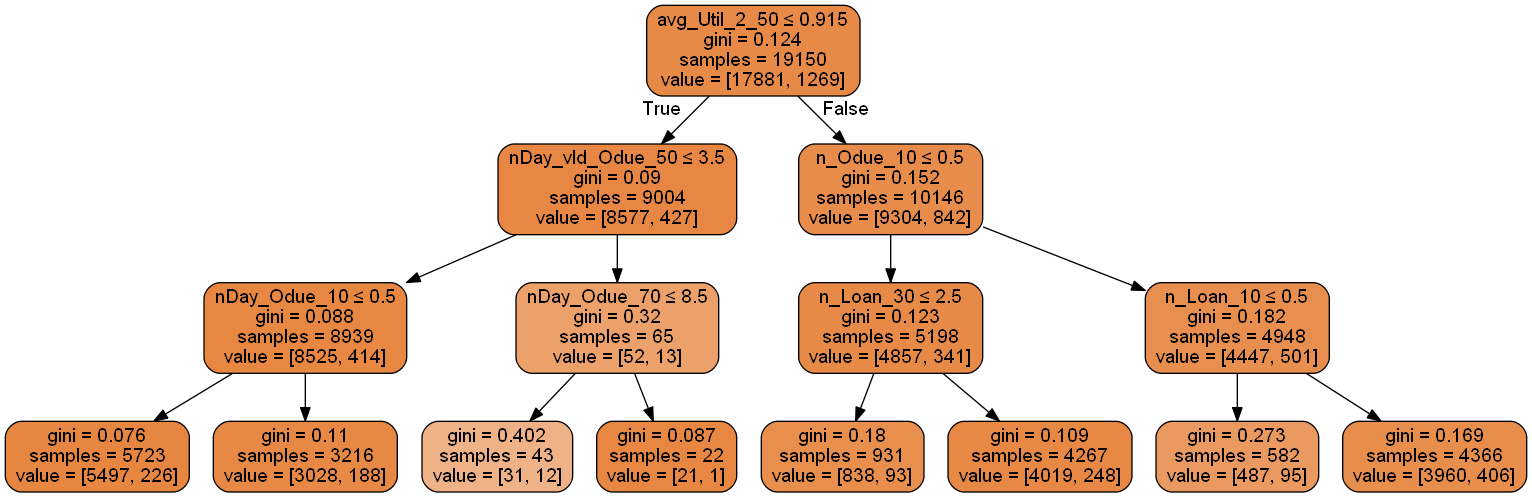

In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score
import pydotplus 
from IPython.display import Image  

# 创建决策树分类器
clf = tree.DecisionTreeClassifier(criterion='gini'
                                  , max_depth=3
                                  , random_state=0
                                  #, min_samples_split=0.01  #最少要有多少个样本才能形成一个新的分支    过拟合
                                                         #如果是float，min_samples_split是一个百分率
                                  , min_samples_leaf =21  #每个决策树的叶子上面的最小样本数量        过拟合
                                  , min_weight_fraction_leaf=0.0   #权重占比决定是否要该叶子        过拟合
                                  , max_features=None    #用于分类的特征值的最大数量。默认为None,使用全部特征值。
                                  , max_leaf_nodes=None  #最大节点数                                过拟合
                                  , class_weight=None
                                  , presort=False
                                  
                                 )
# 训练模型
clf = clf.fit(x_train, y_train)
print("train score:", clf.score(x_train, y_train))
print("test score:", clf.score(x_test, y_test))

dot_data = tree.export_graphviz( clf
                                ,out_file=None 
                                ,feature_names=x_train.columns
                                #,class_names=[train_set['target'].unique()]
                                ,filled=True #是否为节点上色
                                ,rounded=True
                                ,special_characters=True
                                ,max_depth=3 #指定展示出来的树的深度
                               )

#不同颜色代表不同类别，颜色深度越浅,各个类别的混杂程度高，颜色越深说明纯度越高

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [10]:
# Gini

node_1_pop = 0
node_1_bad = 0
node_2_pop = 0
node_2_bad = 0
node_3_pop = 0
node_3_bad = 0
node_4_pop = 0
node_4_bad = 0
node_5_pop = 0
node_5_bad = 0
node_6_pop = 0
node_6_bad = 0
node_7_pop = 0
node_7_bad = 0
node_8_pop = 0
node_8_bad = 0


for i in range(0,4216):
    if test_set.loc[i,'avg_Util_2_50']<=0.915:
        if test_set.loc[i,'nDay_vld_Odue_50']<=3.5:
            if test_set.loc[i,'nDay_Odue_10']<=0.5:
                node_1_pop = node_1_pop+1
                if test_set.loc[i,'target']==1:
                    node_1_bad = node_1_bad+1
            else:
                node_2_pop = node_2_pop+1
                if test_set.loc[i,'target']==1:
                    node_2_bad = node_2_bad+1
        else:
            if test_set.loc[i,'nDay_Odue_70']<=8.5:
                node_3_pop = node_3_pop+1
                if test_set.loc[i,'target']==1:
                    node_3_bad = node_3_bad+1
            else:
                node_4_pop = node_4_pop+1
                if test_set.loc[i,'target']==1:
                    node_4_bad = node_4_bad+1
    else:
        if test_set.loc[i,'n_Loan_30']<=2.5:
            if test_set.loc[i,'total_nDay_Pdue']<=2.5:
                node_5_pop = node_5_pop+1
                if test_set.loc[i,'target']==1:
                    node_5_bad = node_5_bad+1
            else:
                node_6_pop = node_6_pop+1
                if test_set.loc[i,'target']==1:
                    node_6_bad = node_6_bad+1
        else:
            if test_set.loc[i,'n_Loan_10']<=0.5:
                node_7_pop = node_7_pop+1
                if test_set.loc[i,'target']==1:
                    node_7_bad = node_7_bad+1
            else:
                node_8_pop = node_8_pop+1
                if test_set.loc[i,'target']==1:
                    node_8_bad = node_8_bad+1      

print(node_1_pop,node_1_bad)
print(node_2_pop,node_2_bad)
print(node_3_pop,node_3_bad)
print(node_4_pop,node_4_bad)
print(node_5_pop,node_5_bad)
print(node_6_pop,node_6_bad)
print(node_7_pop,node_7_bad)
print(node_8_pop,node_8_bad)

1534 85
777 68
12 1
7 0
102 10
29 2
3 1
1752 190


In [3]:
# Entropy

node_1_pop = 0
node_1_bad = 0
node_2_pop = 0
node_2_bad = 0
node_3_pop = 0
node_3_bad = 0
node_4_pop = 0
node_4_bad = 0
node_5_pop = 0
node_5_bad = 0
node_6_pop = 0
node_6_bad = 0
node_7_pop = 0
node_7_bad = 0
node_8_pop = 0
node_8_bad = 0


for i in range(0,4216):
    if test_set.loc[i,'avg_Util_2_50']<=0.915:
        if test_set.loc[i,'nDay_vld_Odue_50']<=3.5:
            if test_set.loc[i,'nDay_Odue_10']<=0.5:
                node_1_pop = node_1_pop+1
                if test_set.loc[i,'target']==1:
                    node_1_bad = node_1_bad+1
            else:
                node_2_pop = node_2_pop+1
                if test_set.loc[i,'target']==1:
                    node_2_bad = node_2_bad+1
        else:
            if test_set.loc[i,'total_n_Odue_in_last_3']<=2.5:
                node_3_pop = node_3_pop+1
                if test_set.loc[i,'target']==1:
                    node_3_bad = node_3_bad+1
            else:
                node_4_pop = node_4_pop+1
                if test_set.loc[i,'target']==1:
                    node_4_bad = node_4_bad+1
    else:
        if test_set.loc[i,'n_Odue_10']<=0.5:
            if test_set.loc[i,'total_nDay_Pdue']<=2.5:
                node_5_pop = node_5_pop+1
                if test_set.loc[i,'target']==1:
                    node_5_bad = node_5_bad+1
            else:
                node_6_pop = node_6_pop+1
                if test_set.loc[i,'target']==1:
                    node_6_bad = node_6_bad+1
        else:
            if test_set.loc[i,'n_Loan_10']<=0.5:
                node_7_pop = node_7_pop+1
                if test_set.loc[i,'target']==1:
                    node_7_bad = node_7_bad+1
            else:
                node_8_pop = node_8_pop+1
                if test_set.loc[i,'target']==1:
                    node_8_bad = node_8_bad+1      

print(node_1_pop,node_1_bad)
print(node_2_pop,node_2_bad)
print(node_3_pop,node_3_bad)
print(node_4_pop,node_4_bad)
print(node_5_pop,node_5_bad)
print(node_6_pop,node_6_bad)
print(node_7_pop,node_7_bad)
print(node_8_pop,node_8_bad)

1534 85
777 68
13 1
6 0
769 81
209 13
57 9
851 100


In [114]:
# 规则导出
with open("clf.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [3]:
# DecisionTreeClassifier 属性
# https://blog.csdn.net/qq_41577045/article/details/79844709
clf.classes_
clf.feature_importances_
clf.max_features_
clf.n_classes_
clf.n_features_
clf.n_outputs_
clf.tree_

bestdepth: 1  bestdepth_score: 0.9152421652421653


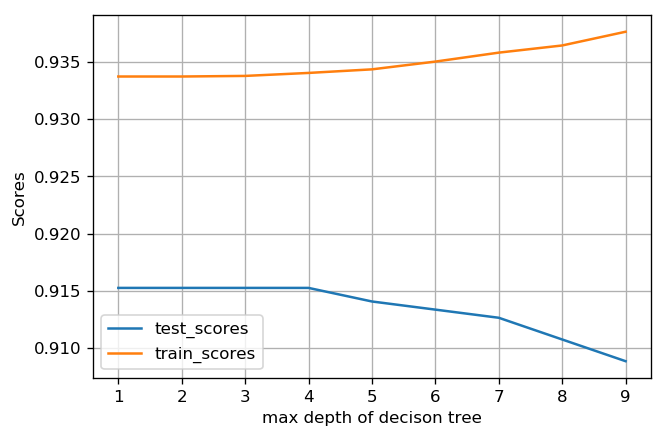

In [91]:
def cv_score(d):
    clf = tree.DecisionTreeClassifier(max_depth=d)
    clf.fit(x_train, y_train)
    return(clf.score(x_train, y_train), clf.score(x_test, y_test))

depths = np.arange(1,10)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
te_scores = [s[1] for s in scores]

# 找出交叉验证数据集评分最高的索引
tr_best_index = np.argmax(tr_scores)
te_best_index = np.argmax(te_scores)

print("bestdepth:", te_best_index+1, " bestdepth_score:", te_scores[te_best_index])

depths = np.arange(1,10)
plt.figure(figsize=(6,4), dpi=120)
plt.grid()
plt.xlabel('max depth of decison tree')
plt.ylabel('Scores')
plt.plot(depths, te_scores, label='test_scores')
plt.plot(depths, tr_scores, label='train_scores')
plt.legend()


#### KS

In [ ]:
FPR（假正率）和TPR（真正率），ROC曲线就是以这两个值为坐标轴画的。
比如逻辑回归得到的结果是概率，那么就要取阈值来划分正负，这时候，每划一个阈值，就会产生一组FPR和TPR的值，
然后把这组值画成坐标轴上的一个点，
这样，当选取多组阈值后，就形成了ROC曲线（每次选取一个不同的阈值，我们就可以得到一组FPR和TPR，即ROC曲线上的一点），
AUC值就是ROC曲线下方的面积。

KS曲线的纵轴是表示TPR和FPR的值，就是这两个值可以同时在一个纵轴上体现，横轴就是阈值,
然后在两条曲线分隔最开的地方，对应的就是最好的阈值，也是该模型最好的AUC值

K-S曲线是正样本洛伦兹曲线与负样本洛伦兹曲线的差值曲线，用来度量阳性与阴性分类区分程度的。K-S曲线的最高点(最大值)定义为KS值，
KS值越大，模型的区分度越好。 
以Logistic Regression为例，说明K-S曲线的做法： 
（1）把Logistic Regression模型对样本的输出概率(predict_proba)从大到小排序得rank−threshold
（2）计算阈值取每个概率时对应的TPR和FPR值 
（3）以(rank−threshold，TPR)画正样本曲线，以(rank−threshold，FPR)画负样本曲线，就构成K-S曲线 
（4）K-S曲线上的KS值，即max(TPR−FPR)，即两条曲线间的最大间隔距离。 


用10等份（即根据模型计算的概率排序后的客户累积数）做为横坐标，
用真阳性率和假阳性率的累计值分别做为纵坐标就得到两个曲线，
即两条洛伦兹曲线，
用每等份下的真阳性率减去假阳性率后得到的值与横坐标即10等份组成的曲线就是KS曲线。


K-S值仅仅代表模型的分割样本的能力

KS: 0.1556224046038649


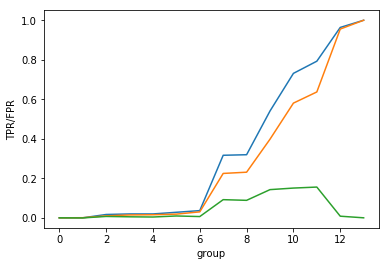

In [92]:
from sklearn.metrics import roc_curve

pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

pred_prob_train = clf.predict_proba(x_train)
pred_prob_test = clf.predict_proba(x_test)

fpr,tpr,thresholds = roc_curve(y_test,pred_prob_test[:,1])
print('KS:',max(tpr-fpr))

import matplotlib.pyplot as plt
plt.xlabel('group')
plt.ylabel('TPR/FPR')
plt.plot(tpr)
plt.plot(fpr)
plt.plot(tpr-fpr)
#plt.axis([0, 1, 0, 1])
plt.show()

In [56]:
def PlotKS(preds, labels, n, asc):
    
    # preds is score: asc=1
    # preds is prob: asc=0
    
    pred = preds  # 预测值
    bad = labels  # 取1为bad, 0为good
    ksds = pd.DataFrame({'bad': bad, 'pred': pred})
    ksds['good'] = 1 - ksds.bad
    
    if asc == 1:
        ksds1 = ksds.sort_values(by=['pred', 'bad'], ascending=[True, True])
    elif asc == 0:
        ksds1 = ksds.sort_values(by=['pred', 'bad'], ascending=[False, True])
    ksds1.index = range(len(ksds1.pred))
    ksds1['cumsum_good1'] = 1.0*ksds1.good.cumsum()/sum(ksds1.good)
    ksds1['cumsum_bad1'] = 1.0*ksds1.bad.cumsum()/sum(ksds1.bad)
    
    if asc == 1:
        ksds2 = ksds.sort_values(by=['pred', 'bad'], ascending=[True, False])
    elif asc == 0:
        ksds2 = ksds.sort_values(by=['pred', 'bad'], ascending=[False, False])
    ksds2.index = range(len(ksds2.pred))
    ksds2['cumsum_good2'] = 1.0*ksds2.good.cumsum()/sum(ksds2.good)
    ksds2['cumsum_bad2'] = 1.0*ksds2.bad.cumsum()/sum(ksds2.bad)
    
    # ksds1 ksds2 -> average
    ksds = ksds1[['cumsum_good1', 'cumsum_bad1']]
    ksds['cumsum_good2'] = ksds2['cumsum_good2']
    ksds['cumsum_bad2'] = ksds2['cumsum_bad2']
    ksds['cumsum_good'] = (ksds['cumsum_good1'] + ksds['cumsum_good2'])/2
    ksds['cumsum_bad'] = (ksds['cumsum_bad1'] + ksds['cumsum_bad2'])/2
    
    # ks
    ksds['ks'] = ksds['cumsum_bad'] - ksds['cumsum_good']
    ksds['tile0'] = range(1, len(ksds.ks) + 1)
    ksds['tile'] = 1.0*ksds['tile0']/len(ksds['tile0'])
    
    qe = list(np.arange(0, 1, 1.0/n))
    qe.append(1)
    qe = qe[1:]
    
    ks_index = pd.Series(ksds.index)
    ks_index = ks_index.quantile(q = qe)
    ks_index = np.ceil(ks_index).astype(int)
    ks_index = list(ks_index)
    
    ksds = ksds.loc[ks_index]
    ksds = ksds[['tile', 'cumsum_good', 'cumsum_bad', 'ks']]
    ksds0 = np.array([[0, 0, 0, 0]])
    ksds = np.concatenate([ksds0, ksds], axis=0)
    ksds = pd.DataFrame(ksds, columns=['tile', 'cumsum_good', 'cumsum_bad', 'ks'])
    
    ks_value = ksds.ks.max()
    ks_pop = ksds.tile[ksds.ks.idxmax()]
    print ('ks_value is ' + str(np.round(ks_value, 4)) + ' at pop = ' + str(np.round(ks_pop, 4)))
    
    # chart
    plt.plot(ksds.tile, ksds.cumsum_good, label='cum_good',
                         color='blue', linestyle='-', linewidth=2)
                         
    plt.plot(ksds.tile, ksds.cumsum_bad, label='cum_bad',
                        color='red', linestyle='-', linewidth=2)
                        
    plt.plot(ksds.tile, ksds.ks, label='ks',
                   color='green', linestyle='-', linewidth=2)
                       
    plt.axvline(ks_pop, color='gray', linestyle='--')
    plt.axhline(ks_value, color='green', linestyle='--')
    plt.axhline(ksds.loc[ksds.ks.idxmax(), 'cumsum_good'], color='blue', linestyle='--')
    plt.axhline(ksds.loc[ksds.ks.idxmax(),'cumsum_bad'], color='red', linestyle='--')
    plt.title('KS=%s ' %np.round(ks_value, 4) +  
                'at Pop=%s' %np.round(ks_pop, 4), fontsize=15)
    
    return ksds


c:\users\elfa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\elfa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ks_value is 0.4366 at pop = 0.1004


,tile,cumsum_good,cumsum_bad,ks
0,0.000000,0.000000,0.0,0.000000
1,0.100427,0.063424,0.5,0.436576
2,0.200380,0.172633,0.5,0.327367
3,0.300332,0.281842,0.5,0.218158
4,0.400285,0.391051,0.5,0.108949
5,0.500237,0.500259,0.5,-0.000259
6,0.600190,0.609468,0.5,-0.109468
7,0.700142,0.718677,0.5,-0.218677
8,0.800095,0.827886,0.5,-0.327886
9,0.900047,0.937095,0.5,-0.437095


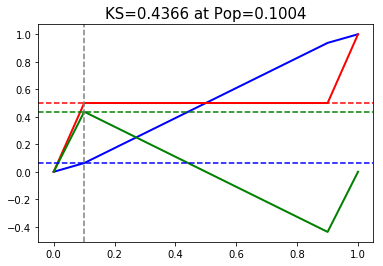

In [62]:
PlotKS(pred_test, y_test, 10, 1)

In [26]:
# https://blog.csdn.net/qq_41577045/article/details/79844709
clf = tree.DecisionTreeClassifier(criterion='gini'   #gini(default)基尼 / entropy信息增益
                                  , splitter='best'  #划分点选择标准，默认为best
                                  , max_depth=None   #树形太过于复杂，可以设置，                防止过拟合
                                  , min_samples_split=2  #最少要有多少个样本才能形成一个新的分支    过拟合
                                                         #如果是float，min_samples_split是一个百分率
                                  , min_samples_leaf =1  #每个决策树的叶子上面的最小样本数量        过拟合
                                  , min_weight_fraction_leaf=0.0   #权重占比决定是否要该叶子        过拟合
                                  , max_features=None    #用于分类的特征值的最大数量。默认为None,使用全部特征值。
                                  , random_state=None    #int,RandomState instance or None  随机数字发生器的种子
                                  , max_leaf_nodes=None  #最大节点数                                过拟合
                                  , class_weight=None
                                  , presort=False
                                  #, min_impurity_split   #最低不纯度                                过拟合
                                 )

### Iris

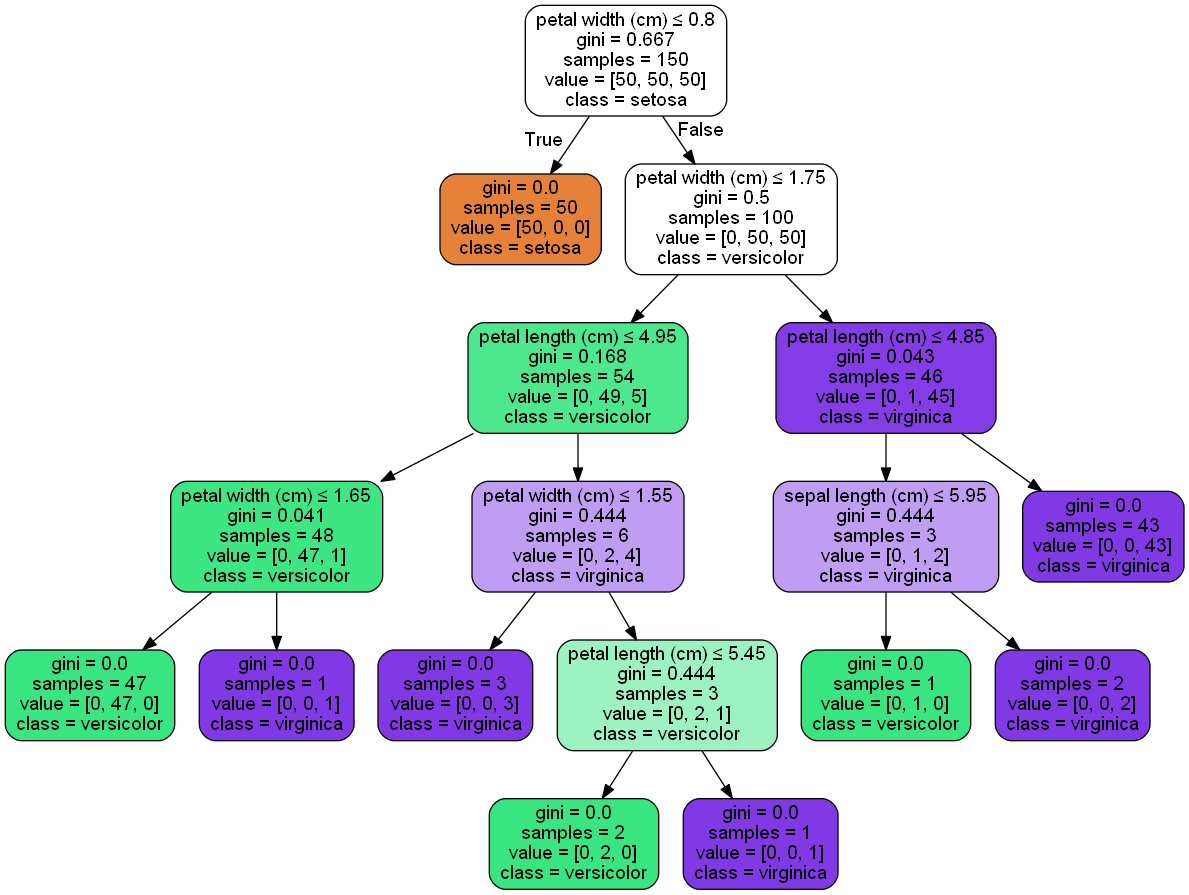

In [9]:
from sklearn.datasets import load_iris
from sklearn import tree
import sys
import os
import pydotplus 
from IPython.display import Image  

iris = load_iris()
clf_iris = tree.DecisionTreeClassifier()
clf_iris = clf_iris.fit(iris.data, iris.target)

# 数据导出 
#with open("iris.dot", 'w') as f:
#    f = tree.export_graphviz(clf_iris, out_file=f)
    
dot_data = tree.export_graphviz(clf_iris
                                ,out_file=None #不专门生成文件
                                ,feature_names=iris.feature_names,class_names=iris.target_names
                                ,filled=True
                                ,rounded=True
                                ,special_characters=True
                               )

graph = pydotplus.graph_from_dot_data(dot_data)

## 在Python中直接生成PDF文件
## graph.write_pdf("iris.pdf")

# 渲染并在行内显示
Image(graph.create_png())